In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

from scipy.stats import norm #normal distribution

In [3]:
#csvファイルの名前をリストで取得
csv_files = glob.glob('/content/drive/MyDrive/csv_to_chart/*.csv')

data_list = []

#csvファイルは基本的にpandasでデータフレームとして表現したほうが良い
#csvファイルが複数の時
for file in csv_files:
  #read_csvでcsvファイルを読み込む
  curr_df = pd.read_csv(file)
  #列数の取得
  df_col_num = len(curr_df.columns)
  #列のname設定
  col_name = [f'test{i}' for i in range(df_col_num)]
  curr_df.columns = col_name

  data_list.append(curr_df)

#複数のデータフレームの結合はconcat
#axis = 0だと行(縦にくっつく),axis =1だと列で結合(横にくっつく)
df_all_csv = pd.concat(data_list, axis = 1)

df_all_csv

,test0,test1,test2,test3,test4,test5,test6,test7,test8,test9
0,-1.322300,0.212062,-0.054588,-2.075369,-0.183518,0.062887,1.147156,-0.006474,1.070177,-0.026643
1,-1.083665,0.248634,-0.391697,0.408138,0.031797,-1.905248,-0.089468,0.632604,0.232205,-1.259072
2,0.371229,-0.219925,-0.381136,1.115526,-0.118176,-1.376320,0.513556,1.431482,-0.986523,-0.493758
3,0.074945,-1.748657,-1.337418,1.492990,-1.045793,0.313575,0.355171,1.330698,-0.129440,-0.781535
4,-1.092937,-1.155996,-0.424423,0.077319,1.259586,1.185239,0.089009,0.395849,0.094098,0.349396
...,...,...,...,...,...,...,...,...,...,...
995,0.583100,-0.239203,1.386713,0.319616,1.719510,-1.351835,0.312535,-2.308805,1.996267,-0.109930
996,0.353793,-0.005842,0.019963,1.323288,2.654584,1.186170,0.139685,-0.159963,0.860013,0.636746
997,-0.207781,1.990081,-0.096908,0.160156,-0.241822,-1.214815,0.054412,0.801306,-0.603394,1.044823
998,-2.369356,0.714331,0.864236,-1.749767,0.539072,-1.645187,0.007097,-0.775607,0.512296,-0.128509


## データフレームの加工
データフレームにすることでデータ分析が簡単になる。
例えば、ヒストグラムを作成したり、和が簡単に求まるため累積した新たなデータフレームを作れる。詳しくはpandasの公式ドキュメントを参照


In [4]:
#@title DataFrameの情報取得
df = df_all_csv

#dfのi行j番目を取得
i = 3
j = 4
jth_label = f'test{j-1}'
print(f'dfの{i}行{j}列目のデータ:{df[jth_label][i]}')
#dfのshapeを取得
print(f'shape:{df.shape}')
#len(df)やlen(df.columns)で行と列数を個別に取得可能
print(f'col:{len(df.columns)}')
print(f'row:{len(df)}')

label = "test1" #df[列名]で列を一個抜き出す
count = df[label].count() #データの個数
mean = df[label].mean() #平均
std = df[label].std() #標準偏差
var = std * std #分散
x_min, x_max = df[label].min(), df[label].max() #データの最小値、最大値
sum = df[label].sum() #合計

print(f'data:{label},データ数:{count},平均:{mean},標準偏差:{std},最大値:{x_max},最小値:{x_min},合計:{sum}')

dfの3行4列目のデータ:1.4929901694369698
shape:(1000, 10)
col:10
row:1000
data:test1,データ数:1000,平均:0.020288360616761897,標準偏差:0.9880148584560488,最大値:2.581782041731164,最小値:-2.9539584243088237,合計:20.288360616761896


In [5]:
#一挙に取得することも可能
print(f'data:all,データ数:{df.count()},平均:{df.mean()},標準偏差:{df.std()},最大値:{df.max()},最小値:{df.min()},合計:{df.sum()}')

data:all,データ数:test0    1000
test1    1000
test2    1000
test3    1000
test4    1000
test5    1000
test6    1000
test7    1000
test8    1000
test9    1000
dtype: int64,平均:test0    0.022041
test1    0.020288
test2   -0.024752
test3    0.038638
test4    0.042838
test5   -0.043276
test6   -0.017833
test7    0.004602
test8    0.000812
test9    0.031229
dtype: float64,標準偏差:test0    1.025423
test1    0.988015
test2    1.019132
test3    0.991285
test4    0.990172
test5    1.010479
test6    1.018538
test7    0.980248
test8    1.000001
test9    1.014048
dtype: float64,最大値:test0    3.584597
test1    2.581782
test2    3.088098
test3    2.824942
test4    2.882106
test5    3.512666
test6    3.230347
test7    2.816122
test8    3.661564
test9    3.138537
dtype: float64,最小値:test0   -3.361801
test1   -2.953958
test2   -3.094510
test3   -2.888078
test4   -2.791023
test5   -3.015146
test6   -2.913302
test7   -5.093803
test8   -2.839447
test9   -3.007550
dtype: float64,合計:test0    22.040556
test1    20.288

## データフレームからグラフに変換する方法を2つ示す

In [9]:
#@title 保存フォルダの作成
dir_name = "fig"
save_path = os.path.join("/content/drive/MyDrive/csv_to_chart",dir_name)

os.makedirs(save_path, exist_ok = True)

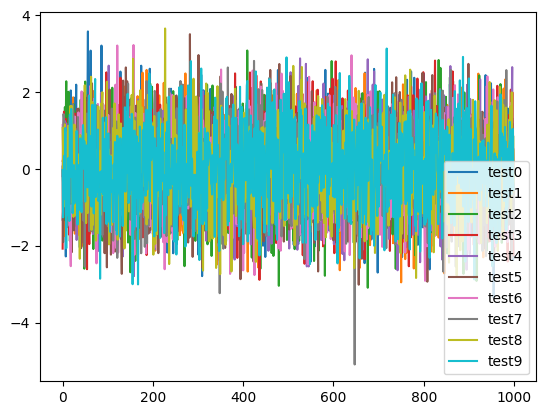

In [10]:
#@title pandasのプロット機能
#pandasにはmatplotlibが使われているのですぐにグラフにできる
df.plot()

#matplotlibの保存機能
plt.savefig('/content/drive/MyDrive/csv_to_chart/fig/chart_pandas.png')

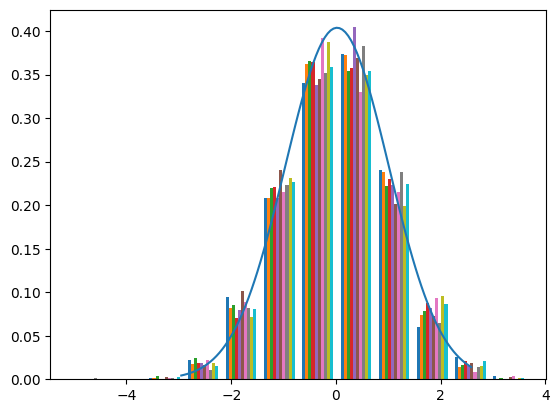

In [12]:
#@title ヒストグラムの作成
#全データであることに注意,各列ごと集計したい場合はdf[label]とする。
x_axis = np.linspace(x_min, x_max, 100)
gaussian_y = norm.pdf(x_axis, loc=mean, scale=std) #正規分布による近似

#各種変数設定
data_upper_bound = 3.0 #データがとりうる上限値
data_lower_bound = -3.0 #データがとりうる下限値
hist_range = 0.5 #ヒストグラムの横軸の幅(階級)

hist_bins = int(abs(data_upper_bound - data_lower_bound)/hist_range) #ヒストグラムのバーの本数

#subplotは1つの紙にax1,ax2,...を書き込んでいくイメージ
fig, ax = plt.subplots()

# ヒストグラム
ax.hist(df,  # データ
        bins=hist_bins,   # BIN数
        density = True  #確率密度で表す
        )

#正規分布
ax.plot(x_axis, gaussian_y)

plt.savefig(f'/content/drive/MyDrive/csv_to_chart/fig/chart_hist.png')

累積したデータを作るには数列を考える必要がある。
もともとのデータを$m\times n$行列$A$とする。具体的に
\begin{align}
A=
\begin{pmatrix}
a_{11}& a_{12} &\cdots &a_{1n}\\
a_{21}& a_{22}& \cdots & a_{2n}\\
\vdots & \vdots & & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{pmatrix}
\end{align}
とする。累積行列を$B$とすると各成分は
\begin{align}
b_{ij} =  \sum_{k=1}^{i} a_{kj}
\end{align}
となればよい。具体的に見ていこう。$b_{3,5}$を作るには列を5にそろえて
\begin{align}
b_{3,5} = a_{1,5} + a_{2,5} +a_{3,5}
\end{align}
とすればよい。これを基にデータフレームを作っていく。

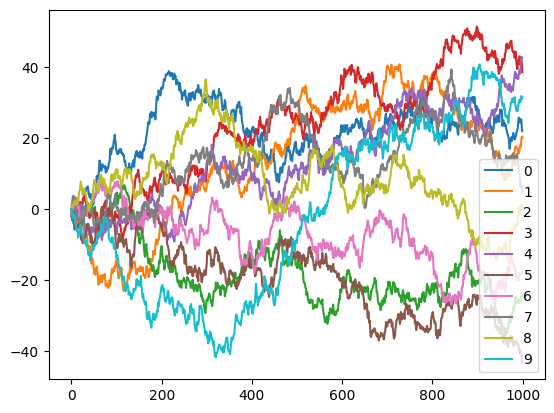

In [15]:
#@title 累積データフレームの作成とプロット

#列を1つ1つ抜き出して計算する。
total_df_col = []

for col in df.columns:
  df_current_col = df[col]
  element_list = []

  element_list.append(df_current_col[0])

  for i in range(len(df_current_col)-1):
    #b_j = b_j-1 + a_j
    element_list.append(element_list[i]+ df_current_col[i+1])

  total_df_col.append(element_list)

#累積データ用のデータフレームをもう一つ新たに作る
total_df = pd.DataFrame(total_df_col)

#行と列が逆になっているので転置する。df.Tもしくはdf.transpose()
total_df = total_df.T

total_df.plot()
plt.savefig('/content/drive/MyDrive/csv_to_chart/fig/chart_total.png')

In [14]:
total_df

,0,1,2,3,4,5,6,7,8,9
0,-1.322300,0.212062,-0.054588,-2.075369,-0.183518,0.062887,1.147156,-0.006474,1.070177,-0.026643
1,-2.405965,0.460696,-0.446284,-1.667231,-0.151720,-1.842361,1.057689,0.626129,1.302381,-1.285715
2,-2.034736,0.240770,-0.827420,-0.551705,-0.269897,-3.218681,1.571245,2.057612,0.315859,-1.779473
3,-1.959791,-1.507887,-2.164838,0.941285,-1.315690,-2.905106,1.926416,3.388309,0.186419,-2.561008
4,-3.052727,-2.663883,-2.589262,1.018604,-0.056104,-1.719866,2.015426,3.784158,0.280517,-2.211612
...,...,...,...,...,...,...,...,...,...,...
995,25.001367,17.789076,-24.868701,41.149055,39.937709,-41.231056,-18.148286,6.370582,0.388348,30.221808
996,25.355159,17.783235,-24.848738,42.472343,42.592293,-40.044886,-18.008601,6.210619,1.248361,30.858554
997,25.147378,19.773315,-24.945645,42.632499,42.350471,-41.259700,-17.954189,7.011925,0.644967,31.903376
998,22.778022,20.487646,-24.081409,40.882732,42.889543,-42.904888,-17.947092,6.236318,1.157263,31.774867
